In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
import sys
sys.path.append("C:/Users/clementine.rosier/OneDrive - Ekimetrics/Documents/GitHub/dynamic_pricing")

%load_ext autoreload
%autoreload 2

In [3]:
from src.simulations import SimpleSimulation
from src.simulation_melange_gaussien import GSumSimulation
from src.simulation_melange_gaussien import GMixSimulation
from src.simulation_uniforme import UniformeSimulation
from src.simple_bandit import SimpleBandit
from src.binomial_bandit import BinomialBandit
from src.simulations_contexte import ContextSimulation


In [4]:
simulation = SimpleSimulation(mu = 60, sigma=10)
simulation.optimal_price

47.683319091796875

In [5]:
sim_u = UniformeSimulation(35,60)
sim_u.optimal_price

35.0000114440918

In [39]:
sim_sum=GSumSimulation(45,12,20,2)
sim_sum.optimal_price

50.58526611328125

In [21]:
sim_mix=GMixSimulation(45,12,80,2,0.25)
sim_mix.optimal_price

75.3076057434082

In [40]:
beta_c=np.array([5,2,3])
mu_c=np.array([3,50,87])
sigma_c=np.array([1,9,10])
beta_d=np.array([[1,-1,0],[2,100,-1]])
n=np.array([2,3])
mu_e=-300
sigma_e=15

sim_context =ContextSimulation(beta_c,mu_c,sigma_c,beta_d,n,mu_e,sigma_e)

In [9]:
def plot_demand(simulation, min_price = 0, max_price = 150, n_points = 50, n_estimates_per_point = 40) : 
    prices = []
    revenues = []
    for price in np.linspace(min_price, max_price, n_points) : 
        revenues.extend( [int(simulation.evaluate(price)) * price for x in range(n_estimates_per_point)] )
        prices.extend([price for x in range(n_estimates_per_point)])
    
    a = np.array([prices, revenues])

    fig = plt.figure(figsize = (15,6), facecolor="w")
    ax = sns.lineplot(a[0], a[1])
    ax.legend("")

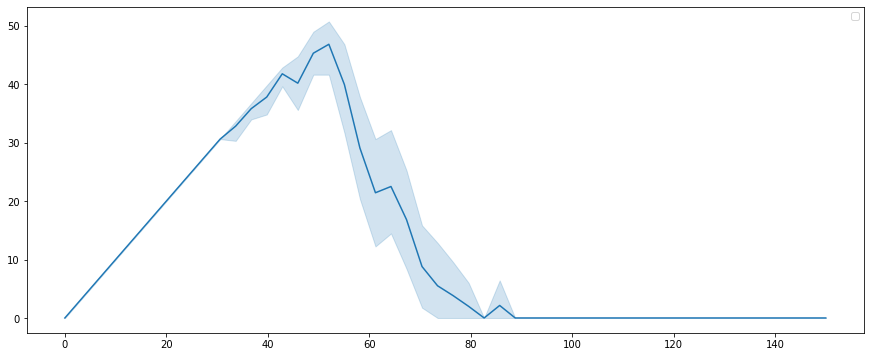

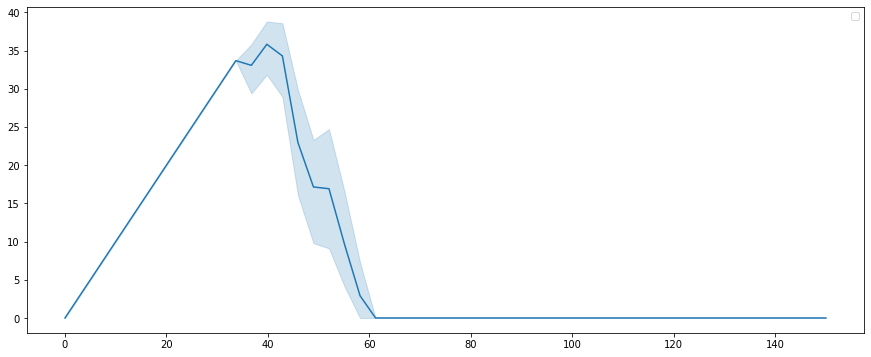

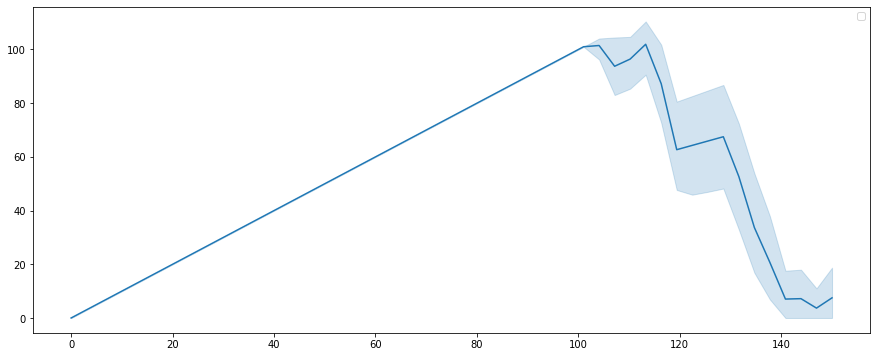

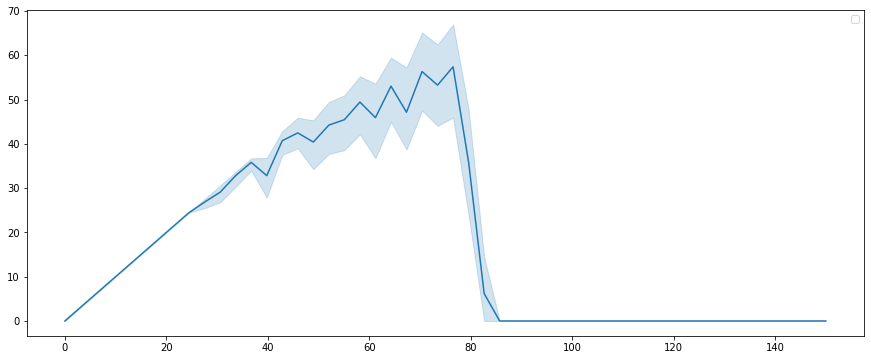

In [10]:
plot_demand(simulation)
plot_demand(sim_u)
plot_demand(sim_sum)
plot_demand(sim_mix)


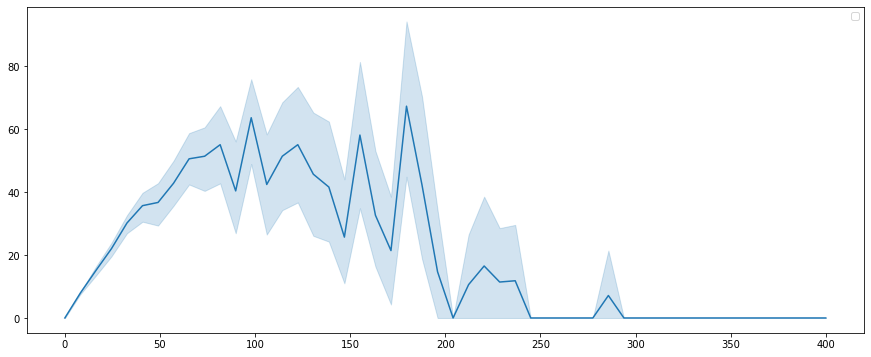

In [41]:
plot_demand(sim_context,0,  400, 50,  40)


In [34]:
for _  in range(5):
    sim_context._simulate()
    print (sim_context.context[1])

[ 3.44134055 44.57010699 88.8290221   2.          1.        ]
[ 1.17595855 67.24071792 81.18321384  1.          3.        ]
[ 4.35016244 35.13869973 62.04733596  2.          1.        ]
[ 2.21850634 55.98050379 69.74040778  1.          1.        ]
[ 3.82732086 44.52310113 91.53874629  2.          2.        ]


### Try simple bandit algorithm on the simulations

In [42]:
size = 30

k_p = np.linspace(20,80,size)
alpha_0 = np.repeat(6,size)
beta_0 = np.repeat(6,size)

bandit = BinomialBandit(k_p, alpha_0, beta_0)

BinomialBandit model instanciated with 30 arms.


In [55]:
def test_bandit(simulation):
    hist = []
    bandit = BinomialBandit(k_p, alpha_0, beta_0)
    # Exploration round
    for i in range(size * 40):
        for j in range(bandit.k):
            bandit.chose_action(force_action=j)
            price = k_p[bandit.action]
            reward = int(simulation.evaluate(price)) * price
            bandit.update(bandit.action, reward)

    for i in range(1000):
        bandit.chose_action(method="thompson")
        price = k_p[bandit.action]
        reward = int(simulation.evaluate(price)) * price
        bandit.update(bandit.action, reward)
        hist.append(bandit.action)
    return hist

In [56]:
#simulation somme de normale
hist_sum=test_bandit(sim_sum)
occ = sorted(Counter(hist_sum).items(), key = lambda k : k[1])
for index, nb_occ in occ : 
    print(f"Bucket {index} -- Nb occ {nb_occ} -- Price {bandit.k_p[index]}")

BinomialBandit model instanciated with 30 arms.
Bucket 17 -- Nb occ 8 -- Price 55.17241379310345
Bucket 13 -- Nb occ 19 -- Price 46.896551724137936
Bucket 15 -- Nb occ 281 -- Price 51.03448275862069
Bucket 14 -- Nb occ 295 -- Price 48.96551724137932
Bucket 16 -- Nb occ 397 -- Price 53.10344827586207


In [57]:
#simulation uniforme
hist_u=test_bandit(sim_u)
occ = sorted(Counter(hist_u).items(), key = lambda k : k[1])
for index, nb_occ in occ : 
    print(f"Bucket {index} -- Nb occ {nb_occ} -- Price {bandit.k_p[index]}")

BinomialBandit model instanciated with 30 arms.
Bucket 7 -- Nb occ 110 -- Price 34.48275862068966
Bucket 8 -- Nb occ 890 -- Price 36.55172413793103


In [59]:
#simulation mélange gaussien
hist_mix=test_bandit(sim_mix)
occ = sorted(Counter(hist_mix).items(), key = lambda k : k[1])
for index, nb_occ in occ : 
    print(f"Bucket {index} -- Nb occ {nb_occ} -- Price {bandit.k_p[index]}")

BinomialBandit model instanciated with 30 arms.
Bucket 24 -- Nb occ 2 -- Price 69.65517241379311
Bucket 25 -- Nb occ 78 -- Price 71.72413793103448
Bucket 26 -- Nb occ 388 -- Price 73.79310344827587
Bucket 27 -- Nb occ 532 -- Price 75.86206896551724


## test du contextual bandit !

In [73]:
k_p=[1,50,100]
size_context=4
q_0=np.array([1,1,1,1])
q_0= np.repeat(q_0[np.newaxis,:],3,axis=0)
q_0

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]])